### Simple Linear Regression

- To use scikit-learn to implment simple linear regression
- Create, train, test, and use a model

#### Step 1. Import packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

#### Step 2. Read the data in

In [7]:
# download the source dataset here: path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
source = "/Users/pc/Desktop/IBM AI Engineer/Machine Learning with Python"
path = source + "FuelConsumptionCo2.csv"

df = pd.read_csv("FuelConsumptionCo2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


#### Step 3. Data Exploration

In [9]:
# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [13]:
# specific features exploration
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.head(9) # show the first 9 rows

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


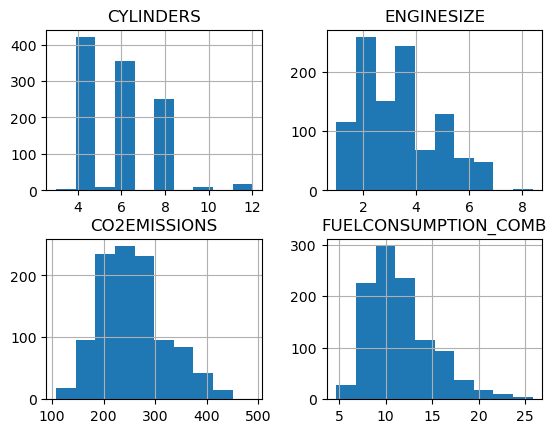

In [14]:
# Plot the features
viz = cdf[['CYLINDERS', 'ENGINESIZE', 'CO2EMISSIONS', 'FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

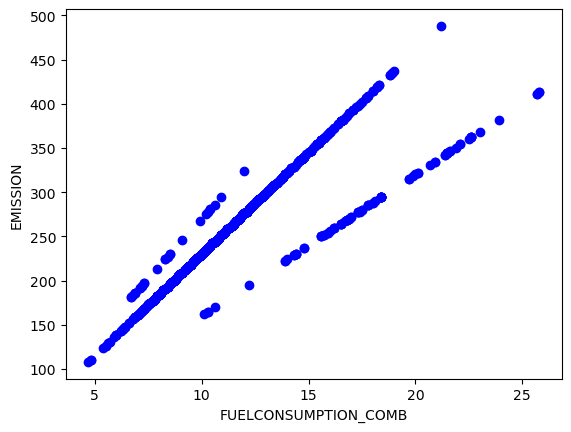

In [15]:
# Plot these features against features

# Plot FUEL CONSUMPTION COMB vs Emission
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('EMISSION')
plt.show()

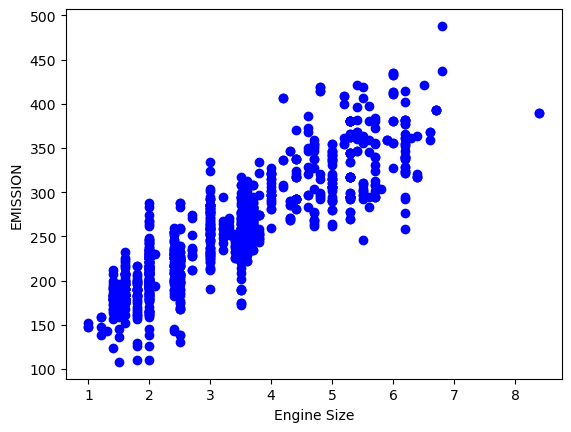

In [16]:
# Plot Engine Size vs Emission
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel('Engine Size')
plt.ylabel('EMISSION')
plt.show()

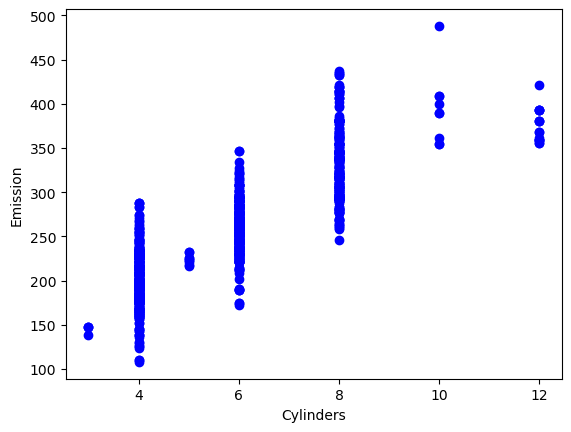

In [17]:
# Plot Cylinder vs Emission
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

#### Step 4. Creating train and test dataset

- 80% train & 20% test
- select random rows using np.random.rand()

In [18]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test  = cdf[~msk]

#### Step 5. Build the Simple Regression Model 
linear regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the MSE.

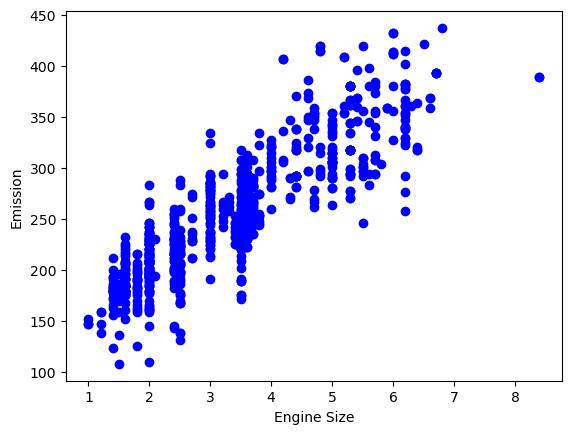

In [19]:
# Train data distribution
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = "blue")
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

In [20]:
# Modelling: use sklearn package to model data
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])
regr.fit(train_x, train_y)

# Coefficients
print("Coefficients: ", regr.coef_)
print("Intercept: ", regr.intercept_)

COefficients:  [[38.68053713]]
Intercept:  [126.4295885]


Text(0, 0.5, 'Emission')

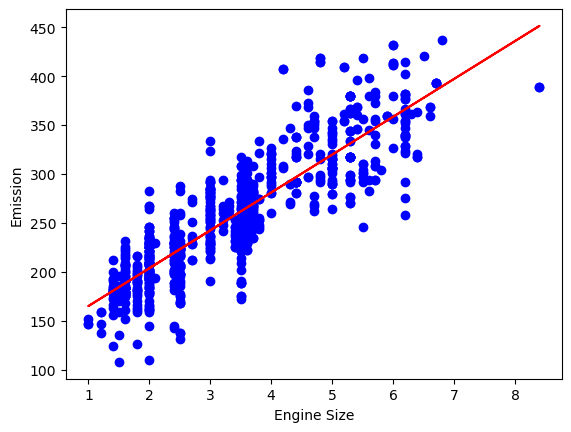

In [22]:
# Plot outputs
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = "blue")
plt.plot(train_x, regr.coef_[0][0] * train_x + regr.intercept_[0], "-r")
plt.xlabel("Engine Size")
plt.ylabel("Emission")

#### Step 6. Evaluation
- MAE
- MSE
- RMSE
- R-squared : measure how close the data to the fitted regression line

In [23]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[["ENGINESIZE"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])
pred_y = regr.predict(test_x)

print("MAE: %.2f" % np.mean(np.absolute(test_y - pred_y)))
print("MSE: %.2f" % np.mean(np.mean((test_y - pred_y)**2)))
print("R2-score: %.2f" % r2_score(test_y, pred_y))


MAE: 22.97
MSE: 912.32
R2-score: 0.78


#### Step 7. Example: Model with another feature

model: FUELCONSUMPTION_COMB vs CO2EMISSIONS

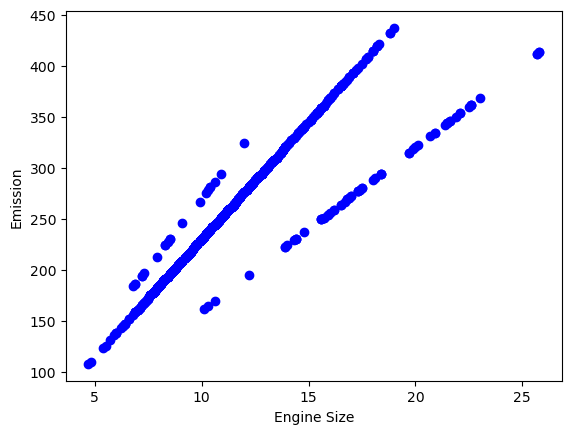

In [24]:
# Train data distribution
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS, color = "blue")
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

In [25]:
# Modelling: use sklearn package to model data
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[["FUELCONSUMPTION_COMB"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])
regr.fit(train_x, train_y)

# Coefficients
print("Coefficients: ", regr.coef_)
print("Intercept: ", regr.intercept_)

COefficients:  [[16.40896794]]
Intercept:  [66.62857264]


Text(0, 0.5, 'Emission')

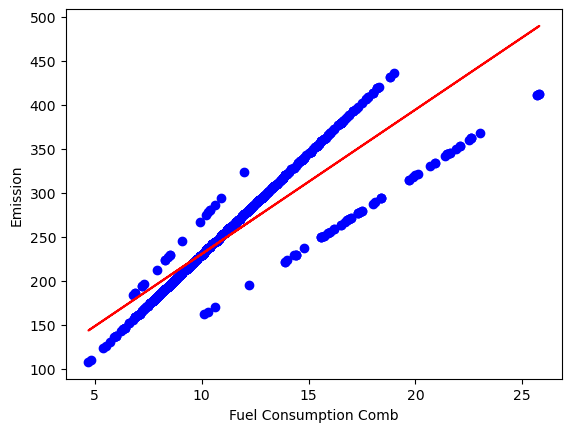

In [26]:
# Plot outputs
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS, color = "blue")
plt.plot(train_x, regr.coef_[0][0] * train_x + regr.intercept_[0], "-r")
plt.xlabel("Fuel Consumption Comb")
plt.ylabel("Emission")

In [27]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[["FUELCONSUMPTION_COMB"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])
pred_y = regr.predict(test_x)

print("MAE: %.2f" % np.mean(np.absolute(test_y - pred_y)))
print("MSE: %.2f" % np.mean(np.mean((test_y - pred_y)**2)))
print("R2-score: %.2f" % r2_score(test_y, pred_y))


MAE: 20.88
MSE: 907.24
R2-score: 0.78
